### Coregistration 

In [23]:
import nibabel as nib
import ants
import os
import glob
import matplotlib.pyplot as plt

In [24]:
path = "C:/Users/muham/Desktop/MSc BME/Medical Image Processing/Acute Ischemic Stroke - Project/MS/"

In [26]:
ref_ants = ants.image_read(path + '1.2.410.200010.20230508.145831.100041.124908_Beyin+Boyun_Anjio_Head_20230504005400_702.nii')

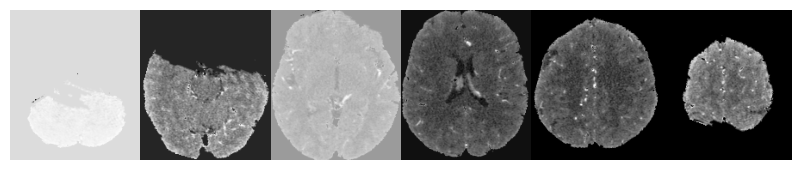

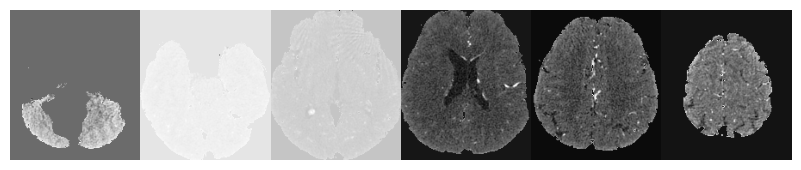

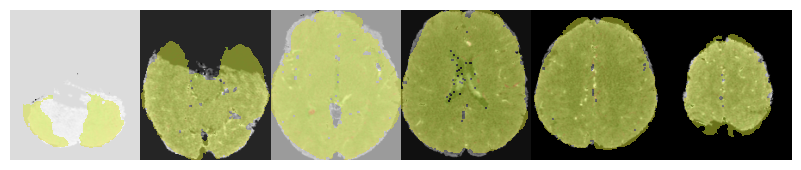

In [29]:
#Sample registration part
sample_img = ants.image_read(path + '1.2.410.200010.20230508.150231.119978.108731_Beyin+Boyun_Anjio_Head_20230503211150_602.nii')
sample_registered = ants.registration(fixed = ref_ants, moving = sample_img, type_of_transform = 'Affine')['warpedmovout']
ants.plot(sample_registered, nslices = 6, axis = 2)
ants.plot(ref_ants, nslices = 6, axis = 2)
ants.plot(sample_registered, nslices = 6, axis = 2, overlay = ref_ants, overlay_alpha = 0.5)

In [31]:
#Saving all registered files
count = 1
for file_path in glob.glob(os.path.join(path, "*.nii")):
    #print("Processing:", file_path)
    img_ants = ants.image_read(file_path)
    registered = ants.registration(fixed = ref_ants, moving = img_ants, type_of_transform = 'Affine')['warpedmovout']
    ants.image_write(registered, str(count)+'registered.nii')
    count = count + 1